In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
from scipy import stats

from matplotlib import cm

In [2]:
Path = 'D:/Results/Onetime/20200706_1stevidence_cb_sub_updraft_GRL/1st_draft_old_withLASSO/Data/'

tmp = glob.glob(Path + 'Composite_W_profile_WRF_20201017.nc')
filename = tmp[0]

fWRF = xr.open_dataset(filename)

wwml_WRF = fWRF['wwml'].values
tkeml_WRF = fWRF['tkeml'].values
wb_00_WRF = fWRF['wcl'].values
wb_01_WRF = fWRF['wcl_01'].values
wb_05_WRF = fWRF['wcl_05'].values
wstar_WRF = fWRF['wstar'].values
aclcb_WRF = fWRF['aclcb'].values
CIN_WRF = fWRF['CIN'].values

indWRF = np.where((100.*aclcb_WRF > 0.1) & 
               (100.*aclcb_WRF < 40.) & 
               (wb_05_WRF > 0) &
               (wstar_WRF > 0) &
               (tkeml_WRF > 0) &
               (CIN_WRF > -100.))

<ipython-input-2-52a14c9f46ac>:20: RuntimeWarning: invalid value encountered in greater
  (wstar_WRF > 0) &


In [3]:
Path = 'D:/Results/Onetime/20200706_1stevidence_cb_sub_updraft_GRL/1st_draft_old_withLASSO/Data/'

tmp = glob.glob(Path + 'Composite_W_profile_SAM_20201017.nc')
filename = tmp[0]

fSAM = xr.open_dataset(filename)

wwml_SAM = fSAM['wwml'].values
tkeml_SAM = fSAM['tkeml'].values
wb_00_SAM = fSAM['wcl'].values
wb_01_SAM = fSAM['wcl_01'].values
wb_05_SAM = fSAM['wcl_05'].values
wstar_SAM = fSAM['wstar'].values
aclcb_SAM = fSAM['aclcb'].values
zcb_SAM = fSAM['zcb'].values
zmltop_SAM = fSAM['zmltop'].values
CIN_SAM = fSAM['CIN'].values

indSAM = np.where((100.*aclcb_SAM > 0.1) & 
               (100.*aclcb_SAM < 40.) & 
               (wb_05_SAM > 0) &
               (wwml_SAM > 0) &
               (tkeml_SAM > 0) &
               (zcb_SAM - zmltop_SAM < 0.5) &
               (CIN_SAM != -100.))

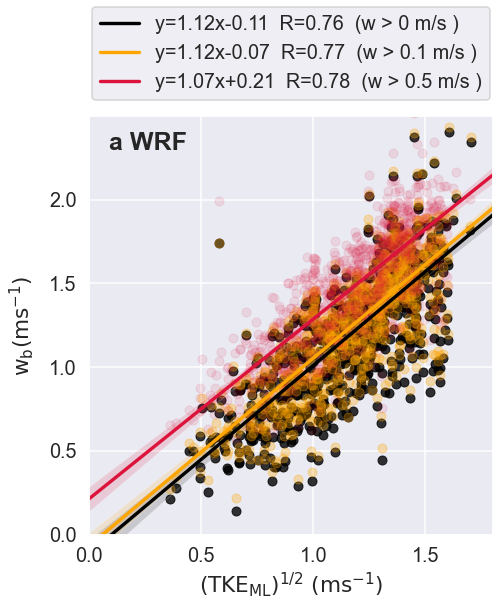

In [20]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)

#WRF
x = np.sqrt(tkeml_WRF[indWRF])
y = wb_00_WRF[indWRF]


axs.set_ylim((0., 2.5))
axs.set_xlim((0., 1.8))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x{1:.2f}  R={2:.2f}  (w > 0 m/s )".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

x = np.sqrt(tkeml_WRF[indWRF])
y = wb_01_WRF[indWRF]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x{1:.2f}  R={2:.2f}  (w > 0.1 m/s )".format(slope,intercept,r_value), "color": "orange"},
           scatter_kws={"color": "orange", 'alpha': 0.3})

x = np.sqrt(tkeml_WRF[indWRF])
y = wb_05_WRF[indWRF]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, 
            line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.5 m/s )".format(slope,intercept,r_value),
                      "color": "crimson"},
            scatter_kws={"color": "crimson", 'alpha': 0.1})

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.15))


axs.set_xlabel(r"$\mathrm{(TKE_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w_b (ms^{-1})}$", labelpad=13)

axs.set_yticks(np.arange(0, 2.5, 0.5))

axs.text(0.05, 0.92, 'a WRF', transform=axs.transAxes,fontsize=25, fontweight='bold')

plt.show()

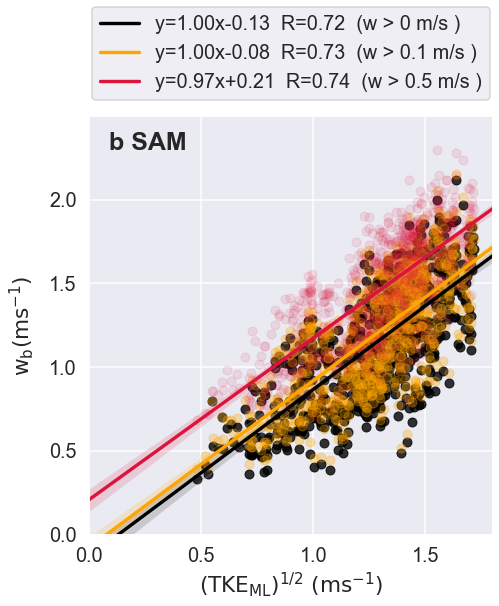

In [19]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)

#SAM
x = np.sqrt(tkeml_SAM[indSAM])
y = wb_00_SAM[indSAM]


axs.set_ylim((0., 2.5))
axs.set_xlim((0., 1.8))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x{1:.2f}  R={2:.2f}  (w > 0 m/s )".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

x = np.sqrt(tkeml_SAM[indSAM])
y = wb_01_SAM[indSAM]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x{1:.2f}  R={2:.2f}  (w > 0.1 m/s )".format(slope,intercept,r_value), "color": "orange"},
           scatter_kws={"color": "orange", 'alpha': 0.3})

x = np.sqrt(tkeml_SAM[indSAM])
y = wb_05_SAM[indSAM]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, 
            line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.5 m/s )".format(slope,intercept,r_value),
                      "color": "crimson"},
            scatter_kws={"color": "crimson", 'alpha': 0.1})

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.15))


axs.set_xlabel(r"$\mathrm{(TKE_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w_b (ms^{-1})}$", labelpad=13)

axs.set_yticks(np.arange(0, 2.5, 0.5))

axs.text(0.05, 0.92, 'b SAM', transform=axs.transAxes,fontsize=25, fontweight='bold')

plt.show()

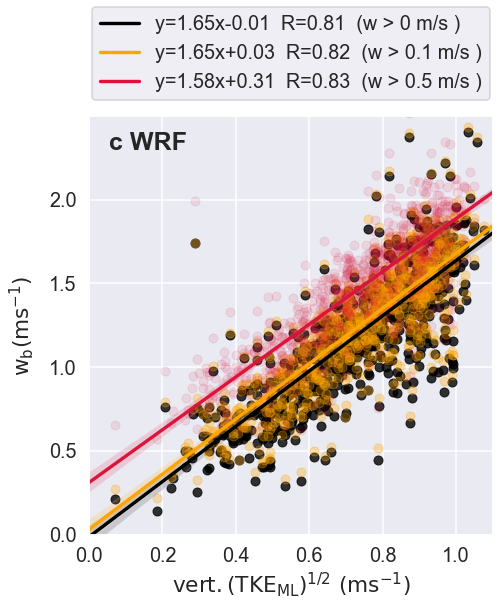

In [18]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)

#WRF
x = np.sqrt(0.5*wwml_WRF[indWRF])
y = wb_00_WRF[indWRF]


axs.set_ylim((0., 2.5))
axs.set_xlim((0., 1.1))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x{1:.2f}  R={2:.2f}  (w > 0 m/s )".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

x = np.sqrt(0.5*wwml_WRF[indWRF])
y = wb_01_WRF[indWRF]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.1 m/s )".format(slope,intercept,r_value), "color": "orange"},
           scatter_kws={"color": "orange", 'alpha': 0.3})

x = np.sqrt(0.5*wwml_WRF[indWRF])
y = wb_05_WRF[indWRF]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, 
            line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.5 m/s )".format(slope,intercept,r_value),
                      "color": "crimson"},
            scatter_kws={"color": "crimson", 'alpha': 0.1})

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.15))


axs.set_xlabel(r"$\mathrm{vert. (TKE_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w_b (ms^{-1})}$", labelpad=13)

axs.set_yticks(np.arange(0, 2.5, 0.5))

axs.text(0.05, 0.92, 'c WRF', transform=axs.transAxes,fontsize=25, fontweight='bold')

plt.show()

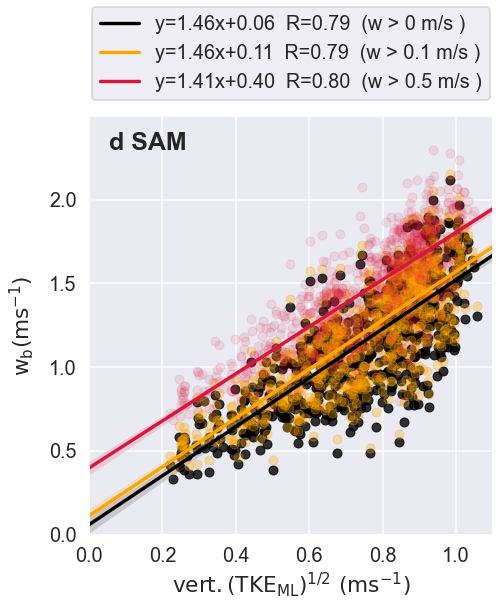

In [17]:
sns.set(context="talk", style="ticks", font_scale=1.2)
sns.set_style("darkgrid")

fig, axs = plt.subplots(1,1,figsize=[7, 7])

fig.tight_layout(w_pad=2., h_pad=2.5)

#WSAM
x = np.sqrt(0.5*wwml_SAM[indSAM])
y = wb_00_SAM[indSAM]

axs.set_ylim((0., 2.5))
axs.set_xlim((0., 1.1))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0 m/s )".format(slope,intercept,r_value), "color": "black"},
           scatter_kws={"color": "black"}, truncate=False)

x = np.sqrt(0.5*wwml_SAM[indSAM])
y = wb_01_SAM[indSAM]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.1 m/s )".format(slope,intercept,r_value), "color": "orange"},
           scatter_kws={"color": "orange", 'alpha': 0.3})

x = np.sqrt(0.5*wwml_SAM[indSAM])
y = wb_05_SAM[indSAM]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

sns.regplot(x=x, y=y, ax = axs, scatter = True, truncate=False, 
            line_kws={'label':"y={0:.2f}x+{1:.2f}  R={2:.2f}  (w > 0.5 m/s )".format(slope,intercept,r_value),
                      "color": "crimson"},
            scatter_kws={"color": "crimson", 'alpha': 0.1})

axs.legend(loc='center', bbox_to_anchor=(0.5, 1.15))


axs.set_xlabel(r"$\mathrm{vert. (TKE_{ML})^{1/2} \ (ms^{-1})}$")
axs.set_ylabel(r"$\mathrm{w_b (ms^{-1})}$", labelpad=13)

axs.set_yticks(np.arange(0, 2.5, 0.5))

axs.text(0.05, 0.92, 'd SAM', transform=axs.transAxes,fontsize=25, fontweight='bold')

plt.show()

In [4]:
from scipy.optimize import curve_fit

#generate table
nrow = 6

slope_tbl = np.zeros(nrow)
transact_tbl = np.zeros(nrow)

slope_err_tbl = np.zeros(nrow)
transact_err_tbl = np.zeros(nrow)

slope_force0_tbl = np.zeros(nrow)
slope_force0_err_tbl = np.zeros(nrow)

corr_tbl = np.zeros(nrow)
p_tbl = np.zeros(nrow)
std_err_tbl = np.zeros(nrow)

In [5]:
x = np.sqrt(0.5*wwml_WRF[indWRF])
y = wb_00_WRF[indWRF]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[0] = slope
transact_tbl[0] = intercept
corr_tbl[0] = r_value
std_err_tbl[0] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[0] = np.sqrt(V[0][0])
transact_err_tbl[0] = np.sqrt(V[1][1])

In [6]:
def fit_func(x, a):
    # Curve fitting function
    return a * x  # d=0 is implied

In [7]:
params = curve_fit(fit_func, x, y)
perr = np.sqrt(np.diag(params[1]))

In [8]:
params

(array([1.63272523]), array([[0.00010859]]))

In [9]:
x = np.sqrt(0.5*wwml_WRF[indWRF])
y = wb_01_WRF[indWRF]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[1] = slope
transact_tbl[1] = intercept
corr_tbl[1] = r_value
std_err_tbl[1] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[1] = np.sqrt(V[0][0])
transact_err_tbl[1] = np.sqrt(V[1][1])

In [10]:
x = np.sqrt(0.5*wwml_WRF[indWRF])
y = wb_05_WRF[indWRF]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[2] = slope
transact_tbl[2] = intercept
corr_tbl[2] = r_value
std_err_tbl[2] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[2] = np.sqrt(V[0][0])
transact_err_tbl[2] = np.sqrt(V[1][1])

In [11]:
x = np.sqrt(0.5*wwml_SAM[indSAM])
y = wb_00_SAM[indSAM]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[3] = slope
transact_tbl[3] = intercept
corr_tbl[3] = r_value
std_err_tbl[3] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[3] = np.sqrt(V[0][0])
transact_err_tbl[3] = np.sqrt(V[1][1])

In [12]:
params = curve_fit(fit_func, x, y)
perr = np.sqrt(np.diag(params[1]))

In [13]:
params

(array([1.53610266]), array([[9.73092841e-05]]))

In [14]:
x = np.sqrt(0.5*wwml_SAM[indSAM])
y = wb_01_SAM[indSAM]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[4] = slope
transact_tbl[4] = intercept
corr_tbl[4] = r_value
std_err_tbl[4] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[4] = np.sqrt(V[0][0])
transact_err_tbl[4] = np.sqrt(V[1][1])

In [15]:
x = np.sqrt(0.5*wwml_SAM[indSAM])
y = wb_05_SAM[indSAM]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope_tbl[5] = slope
transact_tbl[5] = intercept
corr_tbl[5] = r_value
std_err_tbl[5] = std_err

p, V = np.polyfit(x, y, 1, cov=True)
slope_err_tbl[5] = np.sqrt(V[0][0])
transact_err_tbl[5] = np.sqrt(V[1][1])

In [16]:
print(slope_tbl)
print(slope_err_tbl)
print(transact_tbl)
print(transact_err_tbl)

print(corr_tbl)
print(std_err_tbl)

[1.65073301 1.64837131 1.57609869 1.46238599 1.46053942 1.40755484]
[0.04208123 0.04093857 0.03731121 0.040673   0.03983821 0.03685648]
[-0.01410512  0.03074122  0.31046526  0.05853083  0.11169888  0.39735509]
[0.03193387 0.03106675 0.02831408 0.03133308 0.03068998 0.02839296]
[0.80871903 0.81592897 0.8286907  0.78576792 0.7915733  0.80342704]
[0.04208123 0.04093857 0.03731121 0.040673   0.03983821 0.03685648]
